Exploratory analysis of SpaceX data with various data visualisations 

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("data/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


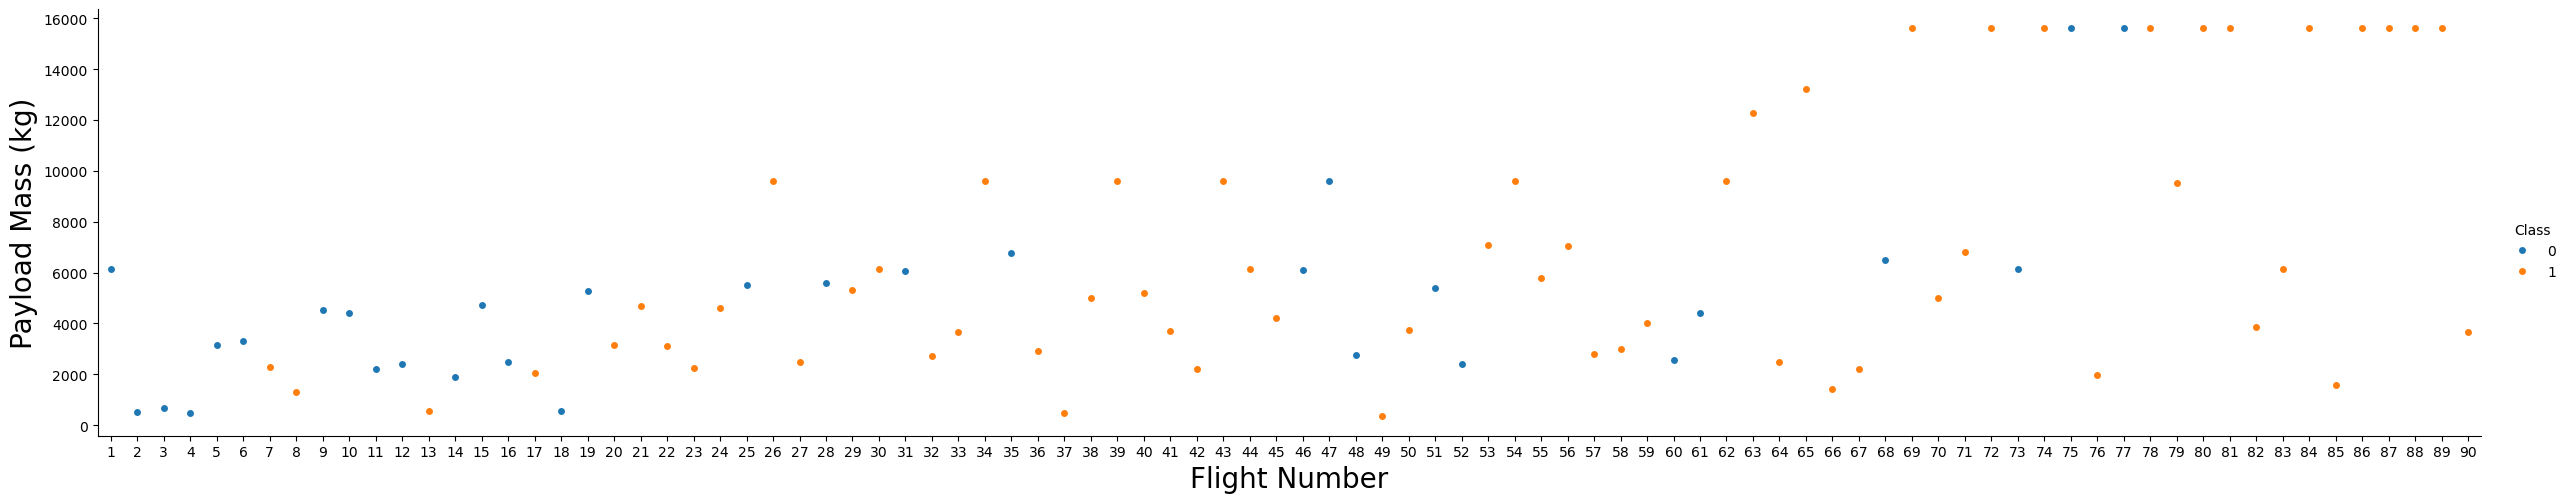

In [7]:
#Categorical plot to visualise the relationship between flight number, payload mass, and class
sns.catplot(x="FlightNumber", y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.show()

As the flight number and payload mass increases, the proportion of success (class = 1) increases.

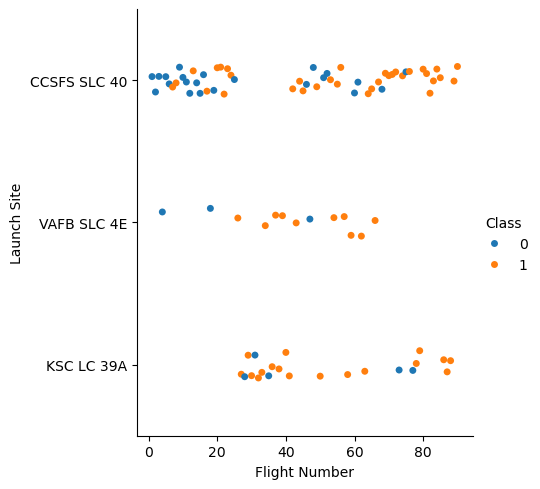

In [8]:
#Categorical plot to visualise the relationship between flight number, launch site, and class
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Launch Site",fontsize=10)
plt.show()

As the flight number increases, the proportion of success (class = 1) increases across launch sites.

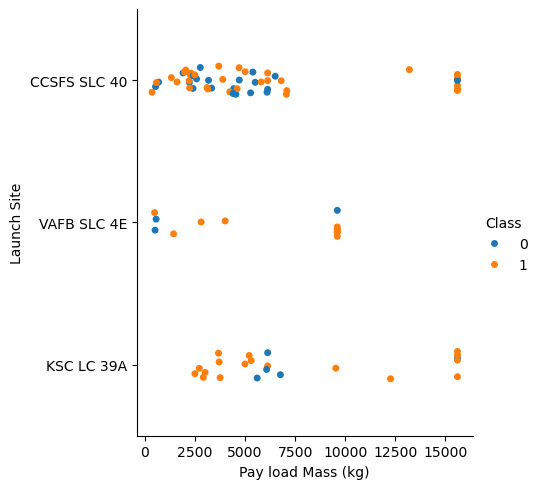

In [9]:
#Categorical plot to visualise the relationship between payload mass, launch site, and class
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Pay load Mass (kg)",fontsize=10)
plt.ylabel("Launch Site",fontsize=10)
plt.show()

The results are mixed but across launch sites, success rate is higher when pay load mass is heavier.
For the VAFB-SLC launch site there are no rockets launched for heavy payload mass (greater than 10000).

<Axes: xlabel='Orbit', ylabel='Success_Rate_Orbit'>

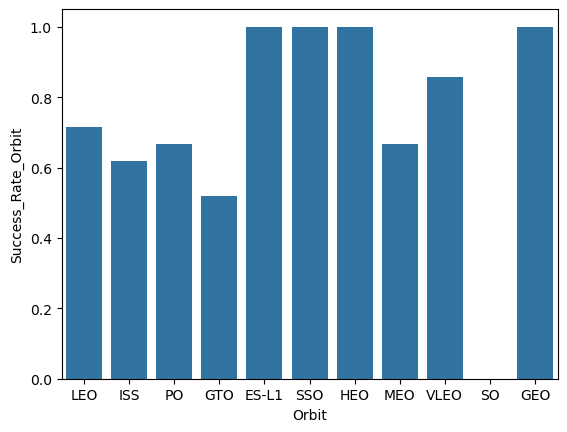

In [10]:
#Bar plot to visualise the success rate by orbit, calculated as the mean success rate for each orbit
df['Success_Rate_Orbit'] = df.groupby('Orbit')['Class'].transform('mean')
sns.barplot(x='Orbit', y='Success_Rate_Orbit', data=df)

For some orbits like ES-L1, SSO, HEO and GEO, the success rate is as high as 1, while GTO has a much lower rate at around 0.5.

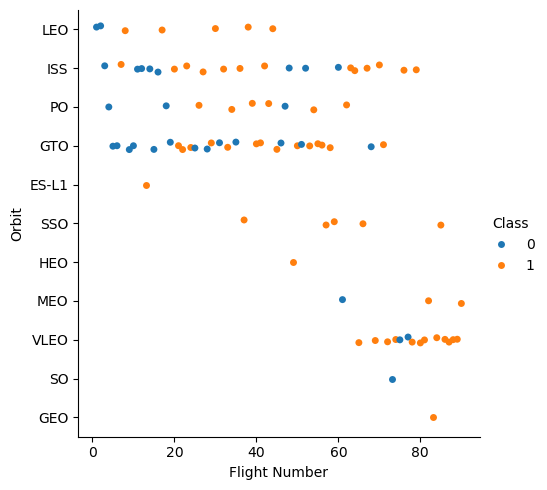

In [12]:
#Categorical plot to visualise the relationship between flight number, orbit, and class.
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Orbit",fontsize=10)
plt.show()

For most orbits, there are more successes as the flight number increases.
The result is mixed for the GTO Orbit.

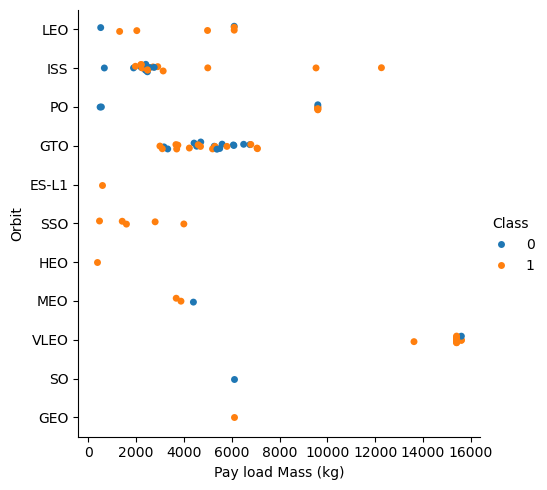

In [13]:
#Categorical plot to visualise the relationship between payload mass, orbit, and class
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Pay load Mass (kg)",fontsize=10)
plt.ylabel("Orbit",fontsize=10)
plt.show()

With heavy payloads the successful landing rate is higher for Polar, LEO and ISS.
However, for GTO we cannot find such a clear relationship with Payload.

<Axes: xlabel='Year', ylabel='Success_Rate_Year'>

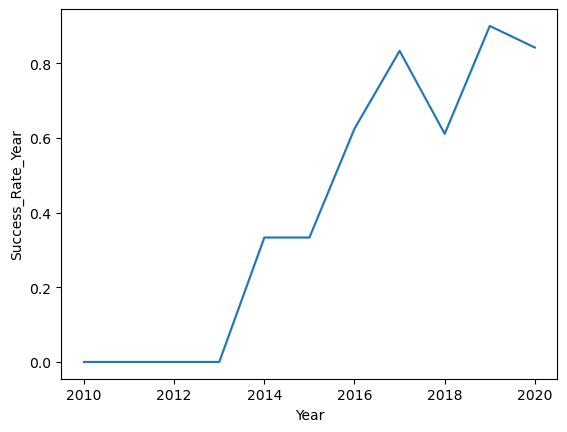

In [14]:
#Line plot to visualise the success rate by year calculated as the mean success rate for each year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Success_Rate_Year'] = df.groupby('Year')['Class'].transform('mean')
sns.lineplot(x='Year', y='Success_Rate_Year', data=df)

Over the decade, the success rate was on an increasing trend though there were a few years when it decreases such as 2018 and 2020